In [56]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

from scipy.signal import savgol_filter
from scipy.stats import binned_statistic


plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

colors = ['tab:blue', 'firebrick', 'orange']



In [57]:
def plot_training_curves(env_name, model_names):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(8, 3)

    linewidth = 0.6

    for i, model_name in enumerate(model_names):
        algorithm_name, name = model_name
        data = pd.read_csv(f'./data/{env_name}/{algorithm_name}/{name}/monitor.csv', skiprows=1)

        num_bins = 100
        binned_mean = binned_statistic(np.arange(len(data['r'])), data['r'], 'mean', num_bins)
        binned_std = binned_statistic(np.arange(len(data['r'])), data['r'], 'std', num_bins)
        
        ax.plot(binned_mean.bin_edges[1:], binned_mean.statistic, 
            linewidth=linewidth, label=model_name, color=colors[i])
        ax.plot(binned_mean.bin_edges[1:], binned_mean.statistic + binned_std.statistic, 
            linewidth=linewidth, color=colors[i], linestyle='--')
        ax.plot(binned_mean.bin_edges[1:], binned_mean.statistic - binned_std.statistic, 
            linewidth=linewidth, color=colors[i], linestyle='--')

    baseline_rewards = np.load(f'./data/{env_name}/baseline/eval_rewards.npy')
    total_reward = np.mean(np.sum(baseline_rewards, axis=0))
    std_reward = np.std(np.sum(baseline_rewards, axis=0))

    ax.axhline(total_reward, color='blue', label='Baseline', linewidth=linewidth)
    #ax.axhline(total_reward + std_reward, color='blue', linewidth=linewidth, linestyle='--')
    #ßax.axhline(total_reward - std_reward, color='blue', linewidth=linewidth, linestyle='--')

    ax.legend()
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')

    fig.tight_layout()
    fig.show()


def plot_eval_episodes(env_name, model_names):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(8, 3)
    
    linewidth = 0.6

    def plot_rewards(rewards, label, color):
        reward_means = np.mean(rewards, axis=0)
        reward_stds = np.std(rewards, axis=0)

        ax[0].plot(reward_means, linewidth=linewidth, label=label, color=color)
        ax[0].plot(reward_means + reward_stds, linewidth=linewidth, color=color, linestyle='--')
        ax[0].plot(reward_means - reward_stds, linewidth=linewidth, color=color, linestyle='--')

        cumulative_rewards = np.cumsum(rewards, axis=1)
        cumulative_reward_means = np.mean(cumulative_rewards, axis=0)
        cumulative_reward_stds = np.std(cumulative_rewards, axis=0)

        ax[1].plot(cumulative_reward_means, linewidth=linewidth, label=label, color=color)
        ax[1].plot(cumulative_reward_means + cumulative_reward_stds, linewidth=linewidth, color=color, linestyle='--')
        ax[1].plot(cumulative_reward_means - cumulative_reward_stds, linewidth=linewidth, color=color, linestyle='--')

    for i, model_name in enumerate(model_names):
        algo_name, name = model_name
        rewards = np.load(f'./data/{env_name}/{algo_name}/{name}/best_model_eval_rewards.npy')

        plot_rewards(rewards, algo_name + ' ' + name, colors[i])
        

    baseline_reward = np.load(f'./data/{env_name}/baseline/eval_rewards.npy')
    plot_rewards(baseline_reward, 'Baseline', 'blue')

    ax[0].legend()
    ax[0].set_xlabel('Episode')
    ax[0].set_ylabel('Reward')

    ax[1].set_xlabel('Episode')
    ax[1].set_ylabel('Cumulative Reward')

    fig.tight_layout()
    fig.show()


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_3182/3199046866.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


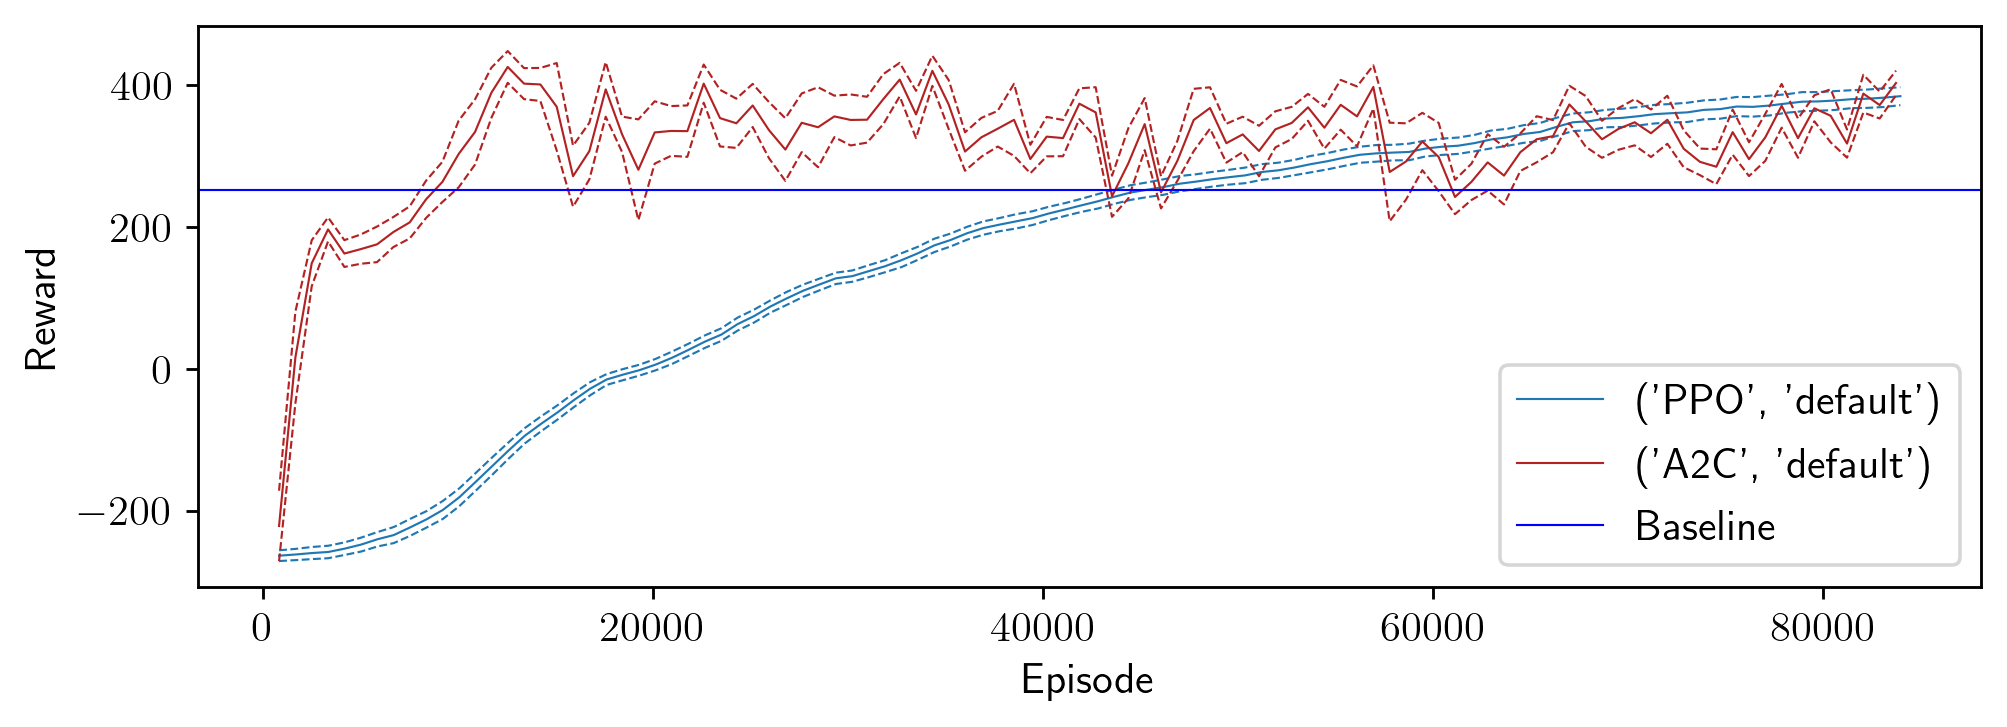

In [58]:
plot_training_curves('InvManagement-v1', [('PPO', 'default'), ('A2C', 'default')])

/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_3182/3199046866.py:78: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


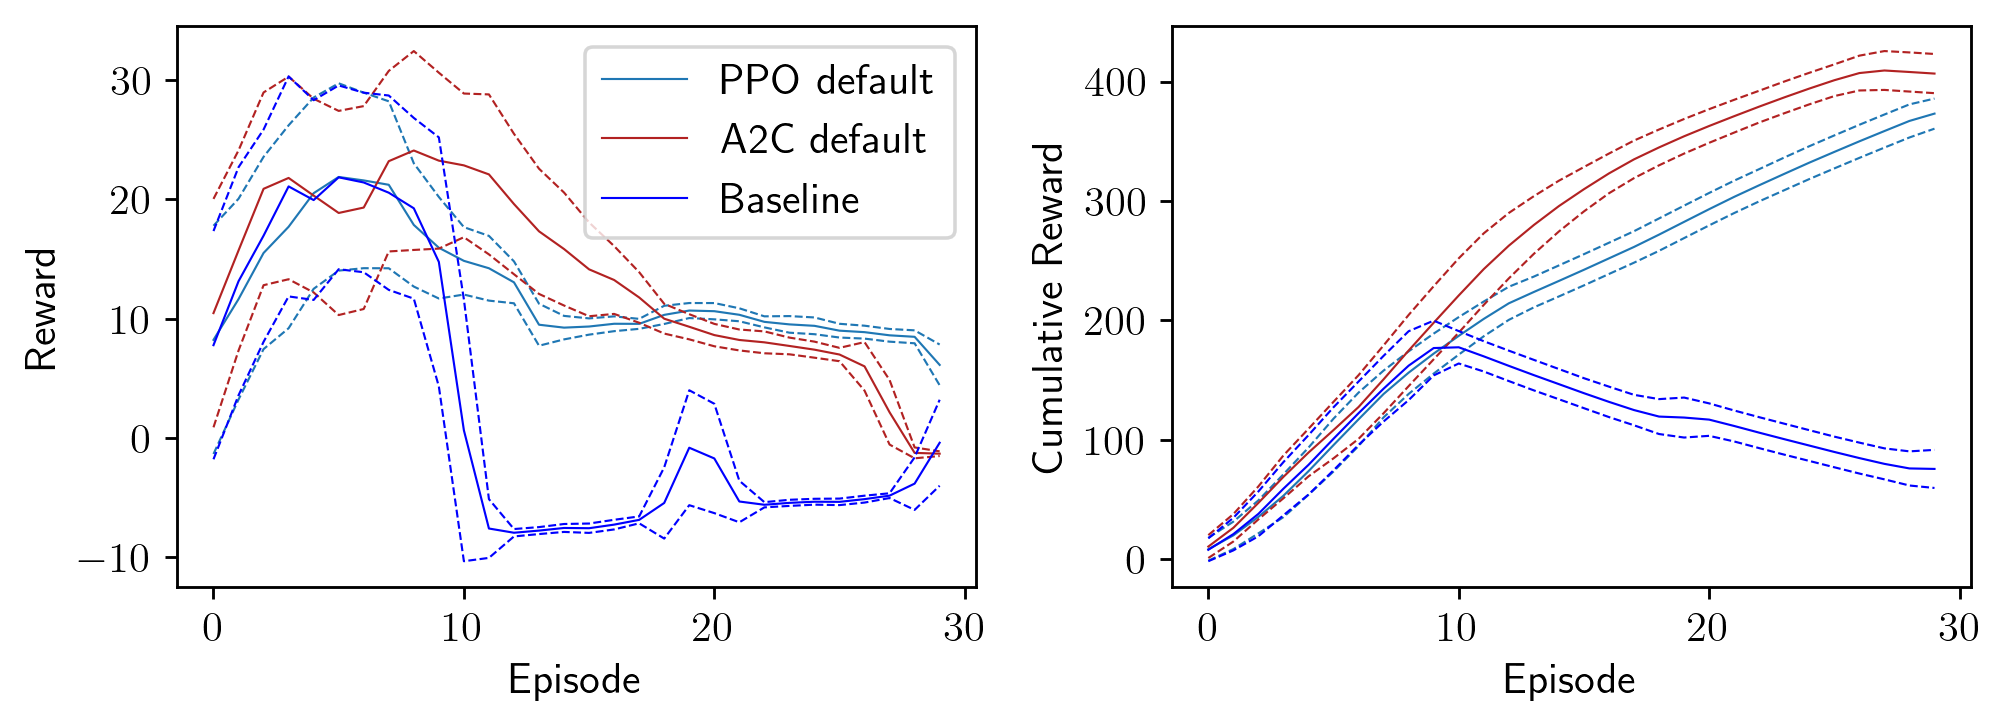

In [59]:
plot_eval_episodes('InvManagement-v1', [('PPO', 'default'), ('A2C', 'default')])